# GRIP : The Sparks Foundation
# Data Science and Busness Analytics intern
# Author : Harshal Kalgaonkar
# Task-5 : Timeline Analysis : Covid-19

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('owid-covid-data.csv');
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [3]:
df.shape

(82286, 59)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82286 entries, 0 to 82285
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               82286 non-null  object 
 1   continent                              78292 non-null  object 
 2   location                               82286 non-null  object 
 3   date                                   82286 non-null  object 
 4   total_cases                            80485 non-null  float64
 5   new_cases                              80483 non-null  float64
 6   new_cases_smoothed                     79482 non-null  float64
 7   total_deaths                           70928 non-null  float64
 8   new_deaths                             71086 non-null  float64
 9   new_deaths_smoothed                    79482 non-null  float64
 10  total_cases_per_million                80049 non-null  float64
 11  ne

In [5]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [6]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,8.048500e+04,80483.000000,79482.000000,7.092800e+04,71086.000000,79482.000000,80049.000000,80047.000000,79051.000000,70505.000000,...,74557.000000,50825.000000,75188.000000,76205.000000,58949.000000,58078.000000,37772.000000,68656.000000,78101.000000,75086.000000
mean,7.757549e+05,5578.300933,5551.832908,2.197933e+04,136.341769,120.407613,9410.539403,72.774183,72.655213,212.894702,...,19130.263693,13.329790,257.633706,7.810239,10.519289,32.652323,50.937322,3.030352,73.158562,0.727275
std,5.382497e+06,34444.651840,33772.016353,1.296575e+05,743.353577,678.913117,18187.822064,175.001632,148.162145,374.702524,...,19799.047685,19.935951,118.709033,3.965129,10.398732,13.475049,31.764379,2.464552,7.550575,0.150063
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000
25%,8.740000e+02,2.000000,6.571000,4.300000e+01,0.000000,0.000000,189.513000,0.175000,1.111000,6.518000,...,4466.507000,0.500000,167.295000,5.290000,1.900000,21.600000,20.859000,1.300000,67.880000,0.602000
50%,9.639000e+03,67.000000,82.357500,2.990000e+02,2.000000,1.143000,1291.086000,7.295000,9.647000,36.554000,...,12951.839000,2.200000,242.648000,7.110000,6.300000,31.400000,49.839000,2.400000,74.530000,0.748000
75%,1.033170e+05,740.000000,769.000000,2.896000e+03,17.000000,13.143000,9195.021000,64.731000,72.610500,227.509000,...,27216.445000,21.200000,329.635000,10.080000,19.300000,41.100000,83.241000,3.861000,78.730000,0.848000
max,1.407195e+08,880837.000000,766230.857000,3.010727e+06,17904.000000,14433.286000,165288.294000,8652.658000,2648.773000,2651.606000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,98.999000,13.800000,86.750000,0.957000


In [9]:
df.nunique()

iso_code                                   215
continent                                    6
location                                   215
date                                       473
total_cases                              43317
new_cases                                11272
new_cases_smoothed                       21436
total_deaths                             16477
new_deaths                                2682
new_deaths_smoothed                       5990
total_cases_per_million                  62139
new_cases_per_million                    35580
new_cases_smoothed_per_million           40069
total_deaths_per_million                 38253
new_deaths_per_million                    6897
new_deaths_smoothed_per_million           8210
reproduction_rate                          364
icu_patients                              2277
icu_patients_per_million                  4789
hosp_patients                             4437
hosp_patients_per_million                 7834
weekly_icu_ad

In [10]:
df.isnull().sum()

iso_code                                     0
continent                                 3994
location                                     0
date                                         0
total_cases                               1801
new_cases                                 1803
new_cases_smoothed                        2804
total_deaths                             11358
new_deaths                               11200
new_deaths_smoothed                       2804
total_cases_per_million                   2237
new_cases_per_million                     2239
new_cases_smoothed_per_million            3235
total_deaths_per_million                 11781
new_deaths_per_million                   11623
new_deaths_smoothed_per_million           3235
reproduction_rate                        15892
icu_patients                             73678
icu_patients_per_million                 73678
hosp_patients                            71904
hosp_patients_per_million                71904
weekly_icu_ad

In [11]:
dataset = df[df['date']=='2021-04-17']
dataset = dataset[~dataset['location'].isin(['World','International'])]
dataset.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
418,AFG,Asia,Afghanistan,2021-04-17,57721.0,109.0,82.429,2539.0,4.0,2.571,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.511
848,OWID_AFR,NaN,Africa,2021-04-17,4422316.0,13363.0,11686.000,117646.0,280.0,317.714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1266,ALB,Europe,Albania,2021-04-17,129456.0,149.0,185.857,2340.0,3.0,4.286,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795
1684,DZA,Africa,Algeria,2021-04-17,119486.0,163.0,158.286,3152.0,4.0,3.714,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.748
2096,AND,Europe,Andorra,2021-04-17,12771.0,59.0,39.143,123.0,0.0,0.429,...,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.868
2490,AGO,Africa,Angola,2021-04-17,24300.0,178.0,138.429,561.0,1.0,1.571,...,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581
2959,ATG,North America,Antigua and Barbuda,2021-04-17,1216.0,3.0,2.714,31.0,0.0,0.143,...,21490.943,NaN,191.511,13.17,NaN,NaN,NaN,3.80,77.02,0.778
3432,ARG,South America,Argentina,2021-04-17,2677747.0,19119.0,22921.000,59164.0,80.0,216.714,...,18933.907,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.845
3845,ARM,Asia,Armenia,2021-04-17,207973.0,870.0,829.429,3859.0,24.0,19.857,...,8787.580,1.8,341.010,7.11,1.5,52.1,94.043,4.20,75.09,0.776
4297,OWID_ASI,NaN,Asia,2021-04-17,33403831.0,409782.0,352671.429,464040.0,2929.0,2538.714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
df["location"].value_counts()

Argentina           473
Mexico              473
Thailand            470
Peru                468
Taiwan              458
                   ... 
Macao                68
Anguilla             68
Falkland Islands     60
Montserrat           52
Saint Helena         51
Name: location, Length: 215, dtype: int64

In [12]:
india=df[df["location"]=="India"]

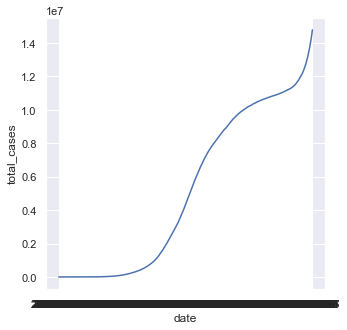

In [13]:
sns.set(rc={"figure.figsize":(5,5)})
sns.lineplot(x="date",y="total_cases",data=india)
plt.show()

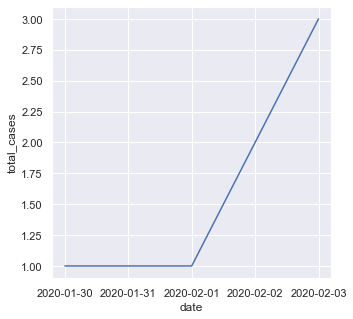

In [14]:
sns.set(rc={"figure.figsize":(5,5)})
sns.lineplot(x="date",y="total_cases",data=india.head())
plt.show()

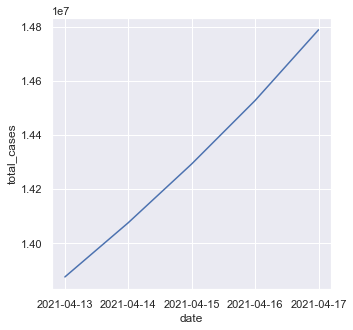

In [16]:
sns.set(rc={"figure.figsize":(5,5)})
sns.lineplot(x="date",y="total_cases",data=india.tail())
plt.show()

In [18]:
brazil=df[df["location"]=="Brazil"]

In [19]:
brazil.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
10540,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
10541,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
10542,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
10543,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
10544,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765


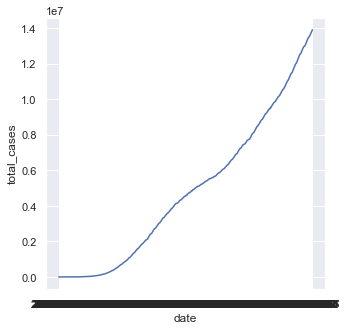

In [20]:
sns.set(rc={"figure.figsize":(5,5)})
sns.lineplot(x="date",y="total_cases",data=brazil)
plt.show()

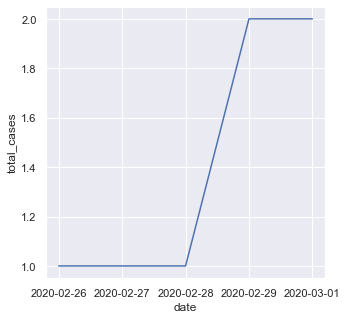

In [21]:
sns.set(rc={"figure.figsize":(5,5)})
sns.lineplot(x="date",y="total_cases",data=brazil.head())
plt.show()

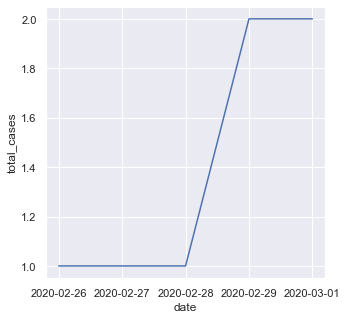

In [22]:
sns.set(rc={"figure.figsize":(5,5)})
sns.lineplot(x="date",y="total_cases",data=brazil.head())
plt.show()

In [23]:
india_japan_china=df[(df["location"]=="India") | (df["location"]=="China") | (df["location"]=="Japan")]


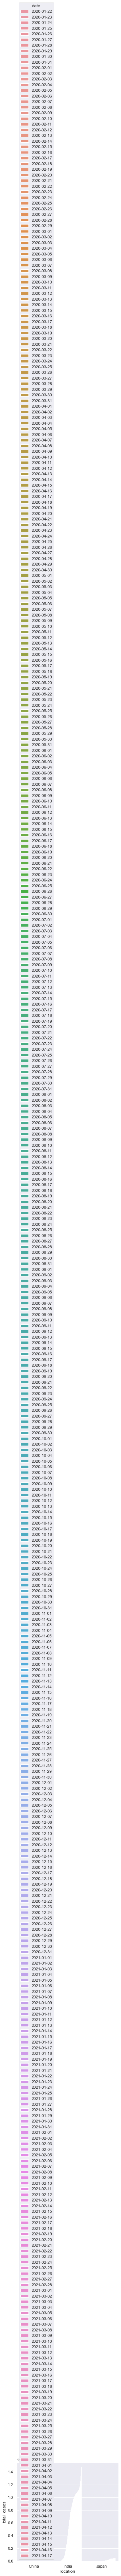

In [24]:
sns.set(rc={"figure.figsize":(5,5)})
sns.barplot(x="location",y="total_cases",data=india_japan_china,hue="date")
plt.show()

In [25]:
germany_spain=df[(df["location"]=="Germany") | (df["location"]=="Spain")]

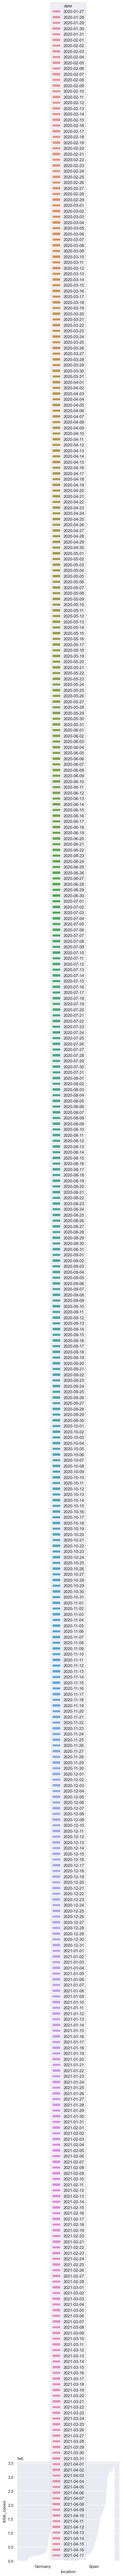

In [26]:
sns.set(rc={"figure.figsize":(5,5)})
sns.barplot(x="location",y="total_cases",data=germany_spain,hue="date")
plt.show()

In [27]:
last_day_cases=df[(df["date"]=="2021-04-17")]
last_day_cases

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
418,AFG,Asia,Afghanistan,2021-04-17,57721.0,109.0,82.429,2539.0,4.0,2.571,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.511
848,OWID_AFR,NaN,Africa,2021-04-17,4422316.0,13363.0,11686.000,117646.0,280.0,317.714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1266,ALB,Europe,Albania,2021-04-17,129456.0,149.0,185.857,2340.0,3.0,4.286,...,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.795
1684,DZA,Africa,Algeria,2021-04-17,119486.0,163.0,158.286,3152.0,4.0,3.714,...,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.748
2096,AND,Europe,Andorra,2021-04-17,12771.0,59.0,39.143,123.0,0.0,0.429,...,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80670,VNM,Asia,Vietnam,2021-04-17,2781.0,9.0,12.714,35.0,0.0,0.000,...,6171.884,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.704
81122,OWID_WRL,NaN,World,2021-04-17,140719503.0,788042.0,766230.857,3010727.0,12010.0,11832.857,...,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737
81495,YEM,Asia,Yemen,2021-04-17,5770.0,55.0,70.571,1119.0,11.0,12.571,...,1479.147,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.470
81891,ZMB,Africa,Zambia,2021-04-17,90844.0,94.0,132.286,1234.0,1.0,1.143,...,3689.251,57.5,234.499,3.94,3.100,24.700,13.938,2.000,63.89,0.584


In [28]:
max_cases_country=last_day_cases.sort_values(by="total_cases",ascending=False)
max_cases_country

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
81122,OWID_WRL,NaN,World,2021-04-17,140719503.0,788042.0,766230.857,3010727.0,12010.0,11832.857,...,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737
25384,OWID_EUR,NaN,Europe,2021-04-17,42981282.0,158080.0,186829.714,975602.0,2975.0,3578.143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54565,OWID_NAM,NaN,North America,2021-04-17,36581414.0,68457.0,85825.143,832071.0,1337.0,1283.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4297,OWID_ASI,NaN,Asia,2021-04-17,33403831.0,409782.0,352671.429,464040.0,2929.0,2538.714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78452,USA,North America,United States,2021-04-17,31628013.0,52373.0,68073.714,566904.0,680.0,718.714,...,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86,0.926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67506,SLB,Oceania,Solomon Islands,2021-04-17,20.0,0.0,0.143,NaN,NaN,0.000,...,2205.923,25.1,459.780,18.68,NaN,NaN,35.890,1.400,73.00,0.567
46985,MHL,Oceania,Marshall Islands,2021-04-17,4.0,0.0,0.000,NaN,NaN,0.000,...,3819.202,NaN,557.793,30.53,NaN,NaN,82.502,2.700,73.70,0.704
79411,VUT,Oceania,Vanuatu,2021-04-17,3.0,0.0,0.000,NaN,NaN,0.000,...,2921.909,13.2,546.300,12.02,2.800,34.500,25.209,NaN,70.47,0.609
63198,WSM,Oceania,Samoa,2021-04-17,3.0,0.0,0.000,NaN,NaN,0.000,...,6021.557,NaN,348.977,9.21,16.700,38.100,NaN,NaN,73.32,0.715


In [29]:
max_cases_country[1:6]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
25384,OWID_EUR,NaN,Europe,2021-04-17,42981282.0,158080.0,186829.714,975602.0,2975.0,3578.143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54565,OWID_NAM,NaN,North America,2021-04-17,36581414.0,68457.0,85825.143,832071.0,1337.0,1283.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4297,OWID_ASI,NaN,Asia,2021-04-17,33403831.0,409782.0,352671.429,464040.0,2929.0,2538.714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78452,USA,North America,United States,2021-04-17,31628013.0,52373.0,68073.714,566904.0,680.0,718.714,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
25835,OWID_EUN,NaN,European Union,2021-04-17,29271952.0,125258.0,151562.143,659876.0,1990.0,2580.857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


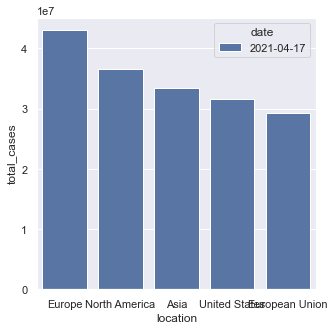

In [30]:
sns.barplot(x="location",y="total_cases",data=max_cases_country[1:6],hue="date")
plt.show()